# Synthesizing the Observation of AR 12712 by the Hi-C Sounding Rocket
The Hi-C sounding rocket had its 3rd flight on 29 May 2018 at approximately 1 PM Eastern Standard time. It was launched from the White Sands Missile range and observed AR NOAA 12712. The data from that observation has not yet been released.

In this notebook, we will simulate the observation of AR 12712 in the 171 Å passband of the instrument.

In [1]:
import os

import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np
import astropy.units as u
import astropy.constants as const
from astropy.coordinates import SkyCoord
import astropy.time
from sunpy.sun import constants
from sunpy.map import Map,GenericMap
from sunpy.net import Fido,attrs as a,vso
from sunpy.time import TimeRange
import sunpy.coordinates
from sunpy.util.metadata import MetaDict

import synthesizAR
import synthesizAR.extrapolate

%matplotlib inline

/Users/willbarnes/anaconda/envs/synthesizar/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Magnetogram and Field Extrapolation
The first step is to pull down the HMI magnetogram, perform a potential field extrapolation, and trace a number of loops through the extrapolated volume.

The HMI data is not yet available from JSOC so we'll try to use the JPEG-2000 data from Helioviewer. We'll probably need to revisit this later on.

In [2]:
magnetogram = Map('/Users/willbarnes/Desktop/2018_05_29__16_59_52_20__SDO_HMI_HMI_magnetogram.jp2')

In [3]:
mag_data = magnetogram.data
mag_data -= mag_data.min()
mag_data = mag_data / mag_data.max() * (magnetogram.meta['datamax'] - magnetogram.meta['datamin'])
mag_data += magnetogram.meta['datamin']

In [4]:
magnetogram_renormalized = Map(mag_data, magnetogram.meta)

/Users/willbarnes/anaconda/envs/synthesizar/lib/python3.6/site-packages/sunpy/map/mapbase.py:669: Warning: Missing metadata for heliographic longitude: assuming longitude of 0 degrees
  lon=self.heliographic_longitude,
/Users/willbarnes/anaconda/envs/synthesizar/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


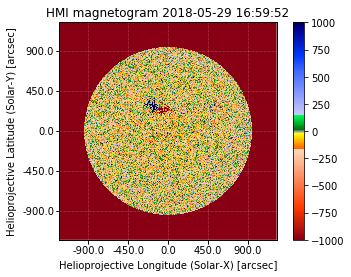

In [5]:
magnetogram_renormalized.peek(vmin=-1e3,vmax=1e3,cmap='hmimag')
plt.show()

In [6]:
blc = SkyCoord(-375*u.arcsec, 50*u.arcsec, frame=magnetogram_renormalized.coordinate_frame)
trc = SkyCoord(150*u.arcsec, 500*u.arcsec, frame=magnetogram_renormalized.coordinate_frame)

In [7]:
magnetogram_ar = magnetogram_renormalized.submap(blc,trc)

/Users/willbarnes/anaconda/envs/synthesizar/lib/python3.6/site-packages/sunpy/map/mapbase.py:669: Warning: Missing metadata for heliographic longitude: assuming longitude of 0 degrees
  lon=self.heliographic_longitude,
/Users/willbarnes/anaconda/envs/synthesizar/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


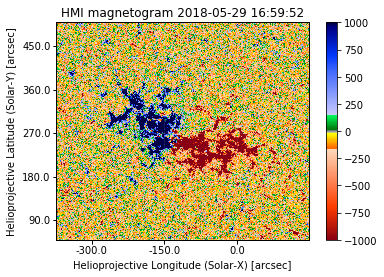

In [8]:
magnetogram_ar.peek(vmin=-1e3,vmax=1e3,cmap='hmimag')
plt.show()

In [10]:
magnetogram_ar_resampled = magnetogram_ar.resample([125,125]*u.pixel)

/Users/willbarnes/anaconda/envs/synthesizar/lib/python3.6/site-packages/sunpy/map/mapbase.py:669: Warning: Missing metadata for heliographic longitude: assuming longitude of 0 degrees
  lon=self.heliographic_longitude,
/Users/willbarnes/anaconda/envs/synthesizar/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


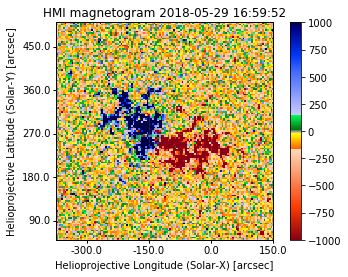

In [11]:
magnetogram_ar_resampled.peek(vmin=-1e3,vmax=1e3,cmap='hmimag')
plt.show()

In [12]:
shape_z = 125*u.pixel
width_z = 0.3*const.R_sun
extrapolator = synthesizAR.extrapolate.PotentialField(magnetogram_ar_resampled,width_z,shape_z)
B_field = extrapolator.extrapolate()

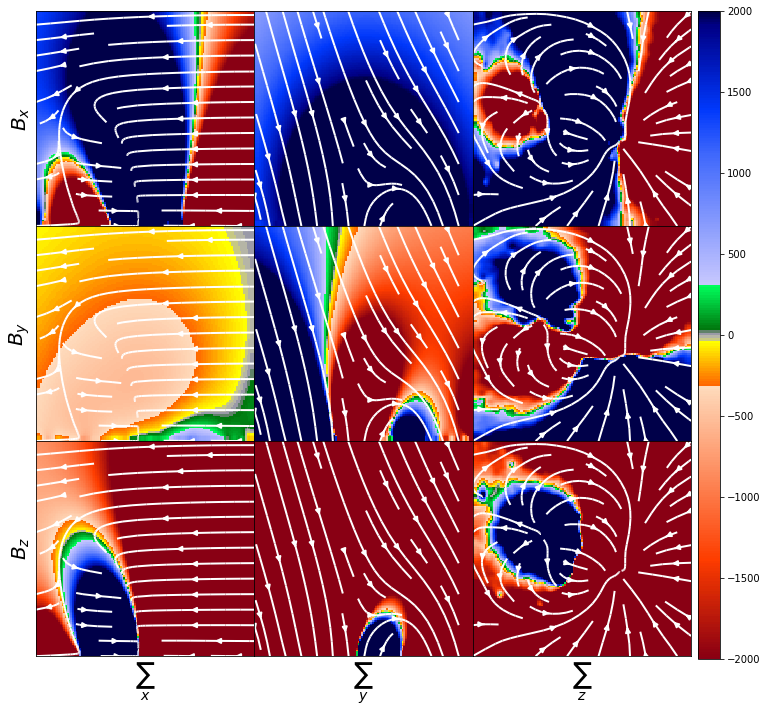

In [13]:
synthesizAR.extrapolate.peek_projections(B_field)

In [24]:
fieldlines_pos = extrapolator.trace_fieldlines(B_field,250,close_threshold=0.05,mask_threshold=0.15,direction=1)

yt : [INFO     ] 2018-05-31 02:47:10,869 Parameters: current_time              = 0.0
yt : [INFO     ] 2018-05-31 02:47:10,869 Parameters: domain_dimensions         = [125 125 125]
yt : [INFO     ] 2018-05-31 02:47:10,871 Parameters: domain_left_edge          = [-1.93691265e+10 -1.57584943e+10  0.00000000e+00]
yt : [INFO     ] 2018-05-31 02:47:10,872 Parameters: domain_right_edge         = [1.81404260e+10 1.87352527e+10 2.08710000e+10]
yt : [INFO     ] 2018-05-31 02:47:10,875 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2018-05-31 02:47:11,673 AMRKDTree rebuilt, Final Volume: 2.700384e+31
Streamlining: 100%|██████████| 250/250 [00:00<00:00, 293.00it/s]
yt : [INFO     ] 2018-05-31 02:47:13,100 AMRKDTree rebuilt, Final Volume: 2.700384e+31
Streamlining: 100%|██████████| 50/50 [00:00<00:00, 362.16it/s]
yt : [INFO     ] 2018-05-31 02:47:13,822 AMRKDTree rebuilt, Final Volume: 2.700384e+31
Streamlining: 100%|██████████| 11/11 [00:00<00:00, 139.57it/s]
yt : [INFO     ] 2018-05

FloatProgress(value=0.0)

In [25]:
fieldlines_neg = extrapolator.trace_fieldlines(B_field,250,close_threshold=0.05,mask_threshold=-0.15,direction=-1)

yt : [INFO     ] 2018-05-31 02:47:25,106 Parameters: current_time              = 0.0
yt : [INFO     ] 2018-05-31 02:47:25,107 Parameters: domain_dimensions         = [125 125 125]
yt : [INFO     ] 2018-05-31 02:47:25,108 Parameters: domain_left_edge          = [-1.93691265e+10 -1.57584943e+10  0.00000000e+00]
yt : [INFO     ] 2018-05-31 02:47:25,111 Parameters: domain_right_edge         = [1.81404260e+10 1.87352527e+10 2.08710000e+10]
yt : [INFO     ] 2018-05-31 02:47:25,112 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2018-05-31 02:47:25,938 AMRKDTree rebuilt, Final Volume: 2.700384e+31
Streamlining: 100%|██████████| 250/250 [00:01<00:00, 184.54it/s]
yt : [INFO     ] 2018-05-31 02:47:28,046 AMRKDTree rebuilt, Final Volume: 2.700384e+31
Streamlining:  72%|███████▏  | 107/149 [00:00<00:00, 199.92it/s]/Users/willbarnes/anaconda/envs/synthesizar/lib/python3.6/site-packages/synthesizAR-0.1.dev744-py3.6.egg/synthesizAR/extrapolate/fieldlines.py:180: UserWarning: Streamlines 

FloatProgress(value=0.0)

In [26]:
active_region = synthesizAR.Field(magnetogram_ar_resampled,fieldlines_neg+fieldlines_pos)

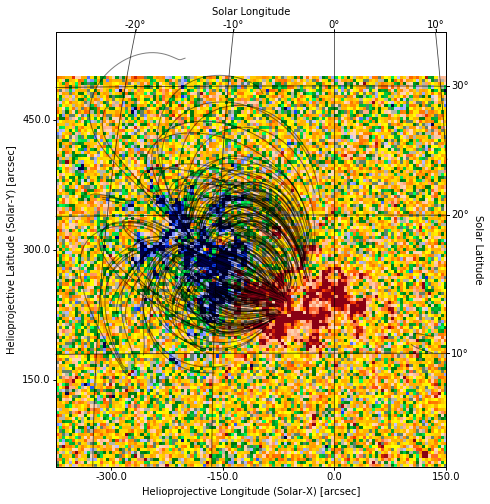

In [27]:
active_region.peek(line_frequency=2)